In [12]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science Project Architecture
## Getting a feel of an end-to-end data science solution

In this lab, you'll see how all the pieces of data science: data analysis, code, tooling, experiments, come together to create a complete project. You'll perform a smaller-scale demonstration of a data science project lifecycle. Of course, you have to keep in mind that "real-life" data science is highly iterative. You might be working on the same task(s) for weeks or months - this lab is not able to show that.

You'll be working with the asthma dataset located [here](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset). As always, it's preloaded for you in the `data/` directory. **Your main goal is to predict what factors lead to positive diagnosis.**

This time, I suggest you do your research into separate notebooks, not inside this one. Use one or several, as you see fit; there are no guidelines as to how many notebooks you should have, or how long (or short) they have to be.

### Problem 1. Project structure (1 point)
Create the necessary directories and structure that you'll use to put your work in. I am providing a suggestion, but you don't have to follow it.
`data/` for... data :D
`notebooks/` for your research. Feel free to move this one inside.
`src/` for Python code (which you'll need to create towards the end of the lab)
`test/` (or `tests/`) for unit tests

You may add any other structure you like. For inspiration, you can see how popular libraries handle their file structure.

Create a GitHub repo (or any other Git-based source control, but I **highly** suggest GitHub) containing your initial project structure. Don't forget to commit relatively often so you have a way to track what you've done so far and go back if something goes awry.

In [5]:
# List of directories 
dirs_to_create = ["data", "notebooks", "src", "tests"]

# Loop through the list and create each directory
for directory in dirs_to_create:
    os.makedirs(directory, exist_ok=True)
    print(f"Directory '{directory}' ensured.")

source_file = 'asthma_disease_data.csv'
destination_folder = 'data'
destination_file = os.path.join(destination_folder, source_file)

# Checking if the source file exists in the current folder and not already in the destination
if os.path.exists(source_file) and not os.path.exists(destination_file):
    shutil.move(source_file, destination_folder)
    print(f"Moved '{source_file}' to '{destination_folder}/'")
elif os.path.exists(destination_file):
    print(f"'{source_file}' is already in the '{destination_folder}/' directory.")
else:
    print(f"Warning: '{source_file}' not found in the project root.")

print("\nCurrent project structure:")
for item in os.listdir('.'):
    if os.path.isdir(item):
        print(f"{item}/")
    else:
        print(item)

Directory 'data' ensured.
Directory 'notebooks' ensured.
Directory 'src' ensured.
Directory 'tests' ensured.
'asthma_disease_data.csv' is already in the 'data/' directory.

Current project structure:
.ipynb_checkpoints/
data/
DS Project Archiecture Lab.ipynb
notebooks/
src/
tests/


In [1]:
!git --version

git version 2.50.1.windows.1


In [2]:
!git init

Initialized empty Git repository in C:/Users/user/Desktop/IVA/Data engeneerig/Data Science/07.Data-Science-Project-Architecture-Lab/.git/


In [3]:
# Creating a .gitignore File
%%writefile .gitignore

# Python virtual environment
env/
venv/
ENV/

# Python cache
__pycache__/
*.pyc

# Jupyter Notebook checkpoints
.ipynb_checkpoints/

# IDE and OS specific files
.idea/
.vscode/
.DS_Store
Thumbs.db

data/

Writing .gitignore


In [6]:
%%writefile README.md

## Overview
This project analyzes the `asthma_disease_data.csv` dataset to identify key factors that contribute to a positive asthma diagnosis. The primary goal is to build and interpret a predictive model.

## Project Structure
- `data/`: Contains the raw and processed data.
- `notebooks/`: Jupyter notebooks for exploratory data analysis, modeling, and experimentation.
- `src/`: Reusable Python source code.
- `tests/`: Unit tests for the code in `src/`.

Writing README.md


In [8]:
!git config --global user.name "Ivalina Simeonova"
!git config --global user.email "ivalinasim@gmail.com"

In [9]:
!git add .
!git commit -m "Initial commit: Set up project structure and initial files"

[master (root-commit) 7e89d3a] Initial commit: Set up project structure and initial files
 3 files changed, 463 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 DS Project Archiecture Lab.ipynb
 create mode 100644 README.md


In [11]:
!git remote add origin https://github.com/ivalinasim-eng/asthma-prediction-project.git
!git branch -M main
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/ivalinasim-eng/asthma-prediction-project.git
 * [new branch]      main -> main


### Problem 2. Data Exploration (1 point)
In an appropriate notebook, load the data. Ensure its validity and start your EDA. Feel free to create any visualizations, tables, filters, etc. you see fit.

In [13]:
# Setting some display options for better readability
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [20]:
file_path = 'data/asthma_disease_data.csv'
df = pd.read_csv(file_path)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [22]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

C:\Users\user\AppData\Local\Temp\ipykernel_3312\1168925010.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis')


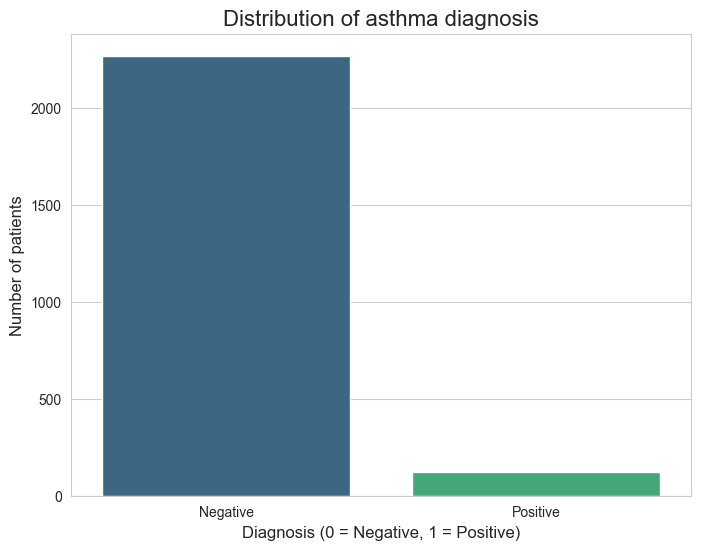

Diagnosis distribution:
Diagnosis
0    0.948161
1    0.051839
Name: proportion, dtype: float64


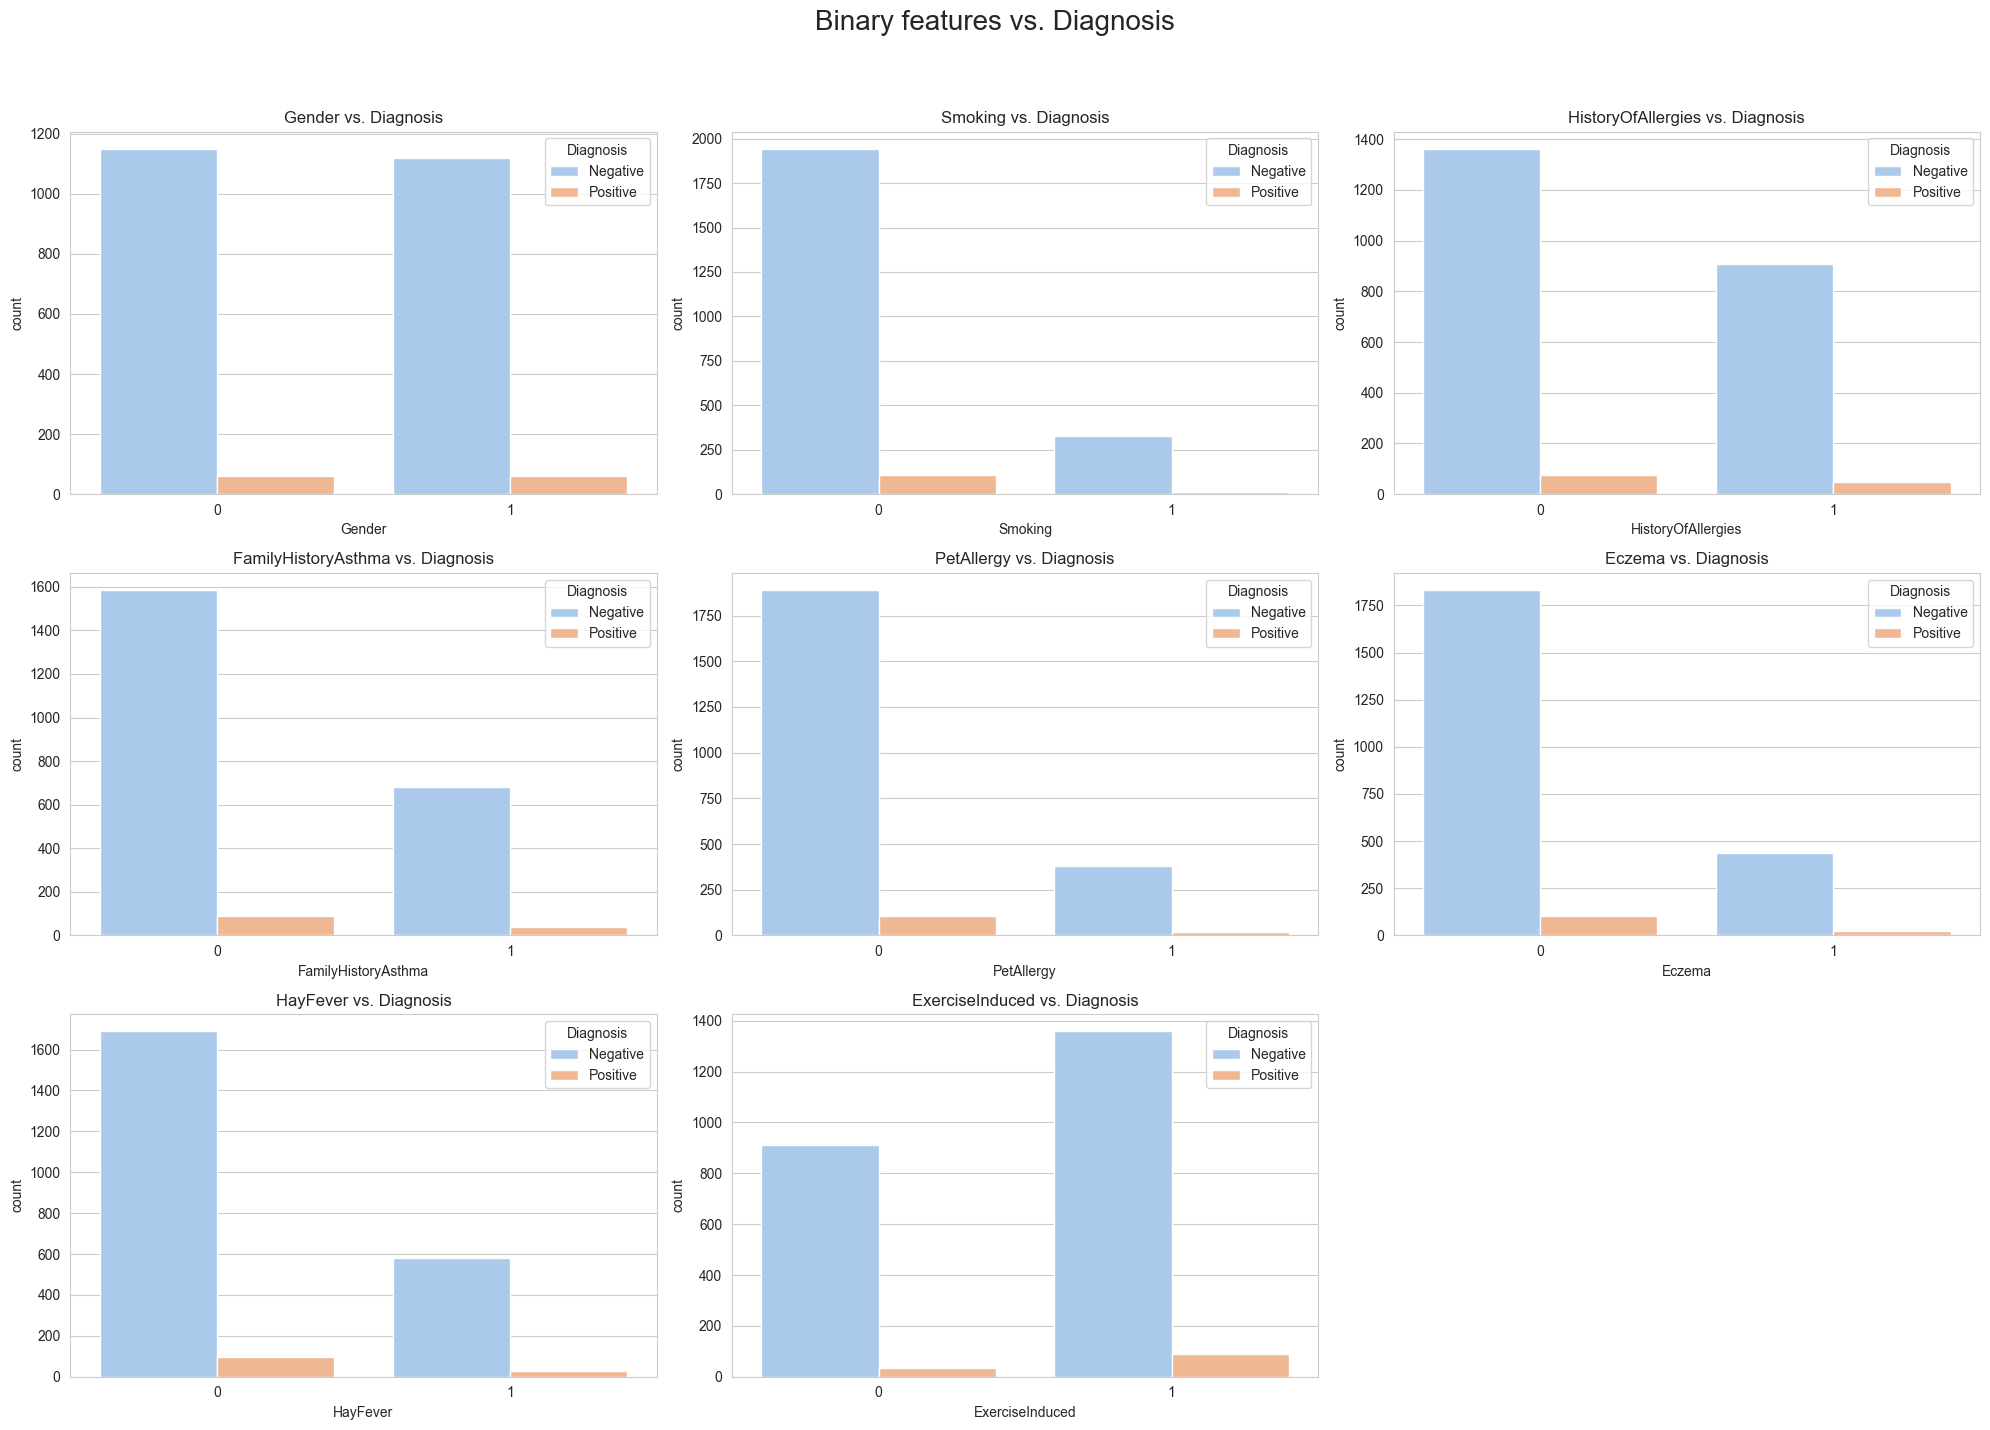

C:\Users\user\AppData\Local\Temp\ipykernel_3312\1168925010.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='plasma')
C:\Users\user\AppData\Local\Temp\ipykernel_3312\1168925010.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='plasma')
C:\Users\user\AppData\Local\Temp\ipykernel_3312\1168925010.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='plasma')
C:\Users\user\AppData\Local\Temp\ipykernel_3312\1168

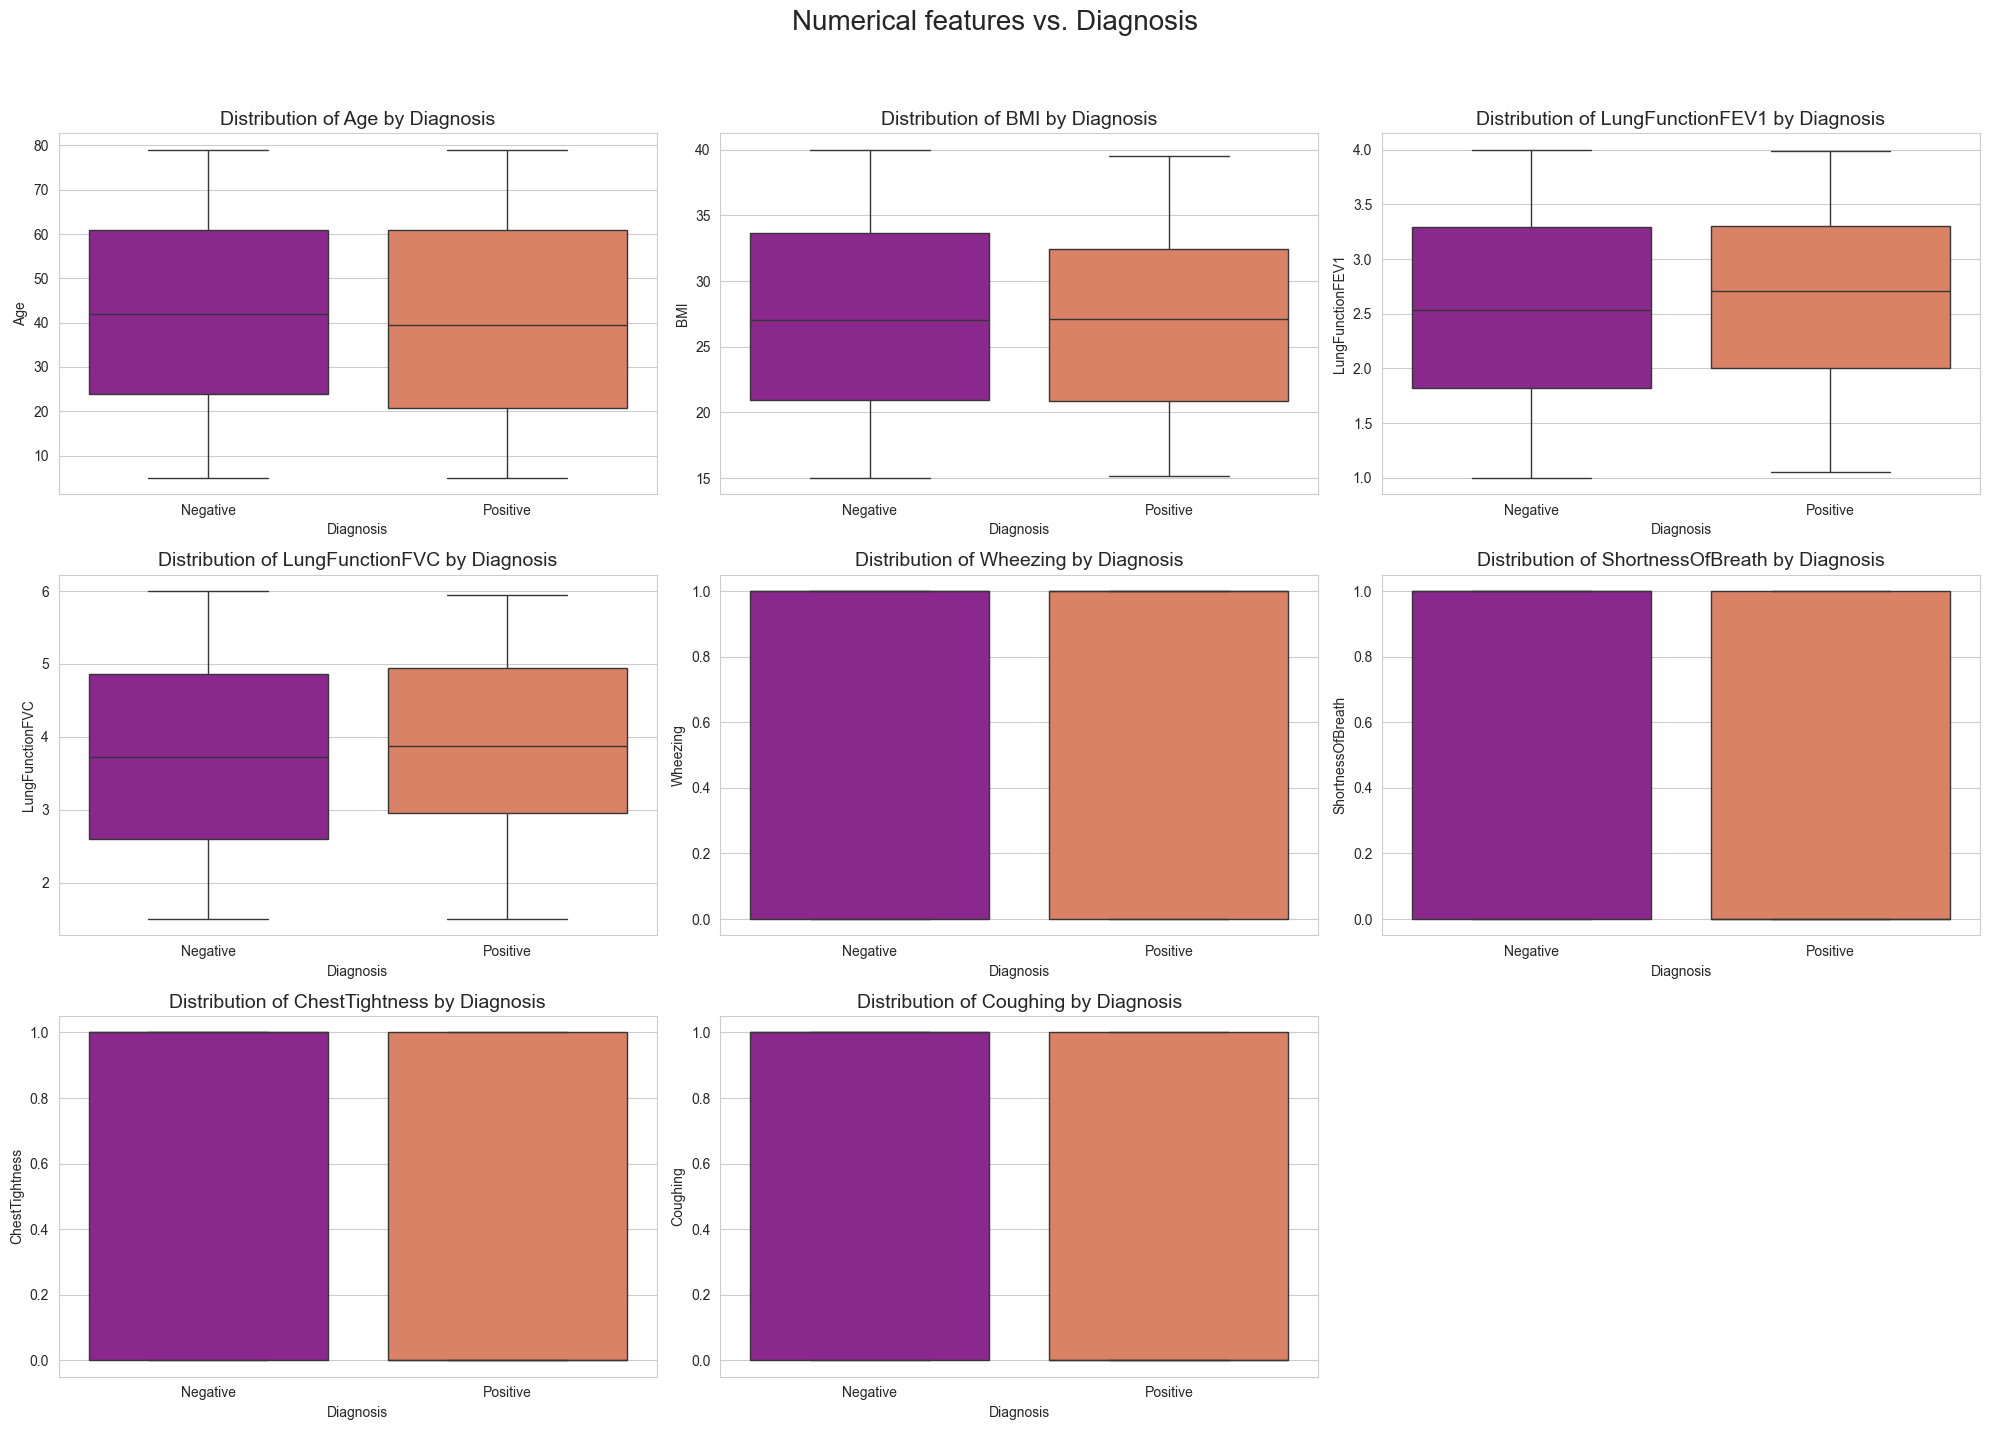

In [26]:
# Summary
df.info()

# Checking for missing values
df.isnull().sum()

# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows in the dataset.")

# Descriptive statistics
df.describe().T

# EDA and vizualizations
sns.set_style('whitegrid')

# Checking the distribution of the most imporant variable: diagnosis
expanded_binary_features = [
    'Gender', 
    'Smoking', 
    'HistoryOfAllergies', 
    'FamilyHistoryAsthma',
    'PetAllergy', 
    'Eczema', 
    'HayFever', 
    'ExerciseInduced'
]

plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Distribution of asthma diagnosis', fontsize=16)
plt.xlabel('Diagnosis (0 = Negative, 1 = Positive)', fontsize=12)
plt.ylabel('Number of patients', fontsize=12)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

print("Diagnosis distribution:")
print(df['Diagnosis'].value_counts(normalize=True))

# Exploaring how binary factors (like Allergies, Smoking) relate to the diagnosis
# List of binary/categorical features to analyze
binary_features = ['Gender', 'Allergies', 'DustExposure', 'GeneticRisk', 'Smoker']

plt.figure(figsize=(20, 15))
plt.suptitle('Binary features vs. Diagnosis', fontsize=20)

for i, feature in enumerate(expanded_binary_features, 1):
    plt.subplot(3, 3, i) # Adjusted grid size for more plots
    sns.countplot(x=feature, hue='Diagnosis', data=df, palette='pastel')
    plt.title(f'{feature} vs. Diagnosis')
    plt.legend(title='Diagnosis', labels=['Negative', 'Positive'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Comparing the distribution of numerical values across our two diagnosis groups

# List of numerical/symptom-related features
expanded_numerical_features = [
    'Age', 
    'BMI', 
    'LungFunctionFEV1', 
    'LungFunctionFVC',
    'Wheezing', 
    'ShortnessOfBreath', 
    'ChestTightness', 
    'Coughing'
]

plt.figure(figsize=(20, 15))
plt.suptitle('Numerical features vs. Diagnosis', fontsize=20)

for i, feature in enumerate(expanded_numerical_features, 1):
    plt.subplot(3, 3, i) # Adjusted grid size for more plots
    sns.boxplot(x='Diagnosis', y=feature, data=df, palette='plasma')
    plt.title(f'Distribution of {feature} by Diagnosis', fontsize=14)
    plt.xticks([0, 1], ['Negative', 'Positive'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Summary of initial findings

This exploratory data analysis has revealed several critical insights into the dataset that will directly influence the modeling strategy.

### Data quality
The dataset is of high quality, consisting of 2,392 complete records with no missing values or duplicates. Most features are numerical, which is convenient for modeling. The `DoctorInCharge` column is non-numeric and likely an identifier that should be dropped before modeling.

### Target variable (Crucial finding)
The most significant finding is that the dataset is **highly imbalanced**. The diagnosis distribution is approximately:
- **Negative (0): 94.8%**
- **Positive (1): 5.2%**

This imbalance is the central challenge for this project. A model trained on this data will be heavily biased towards predicting "Negative" and could achieve high accuracy while being completely useless at identifying positive cases.

### Strong potential predictors
- **Clinical measurements:** The lung function tests are very powerful predictors. The box plots clearly show that patients with a positive diagnosis have a significantly **lower median `LungFunctionFEV1` and `LungFunctionFVC`**.
- **History & allergies:** A patient's medical and family history are strong indicators. The count plots show that the *proportion* of positive diagnoses is much higher for patients with a `FamilyHistoryAsthma`, `HistoryOfAllergies`, `PetAllergy`, `Eczema`, and `HayFever`.
- **Symptoms:** The presence of symptoms is extremely predictive. The plots for `Wheezing`, `ShortnessOfBreath`, `ChestTightness`, and `Coughing` show that virtually **all patients with a positive diagnosis report having these symptoms**.

### Moderate potential predictors
- **BMI:** The `BMI` for the positive diagnosis group appears to have a slightly higher median, suggesting it may have some predictive value, though there is substantial overlap with the negative group.

### Weak potential predictors
- **Demographics:** `Age` and `Gender` show almost no difference between the two diagnosis groups and are likely weak predictors.
- **Lifestyle:** `Smoking` also appears to be a weak indicator in this dataset.

### Implications and next steps
1.  **Address class imbalance:** Before training any model, the severe class imbalance **must** be handled. Techniques like **SMOTE** (to create more positive samples) or using `class_weights` in the model will be necessary.
2.  **Use appropriate metrics:** **Accuracy** will be a misleading metric. The model's performance must be evaluated using metrics robust to imbalance, such as **Precision, Recall, and the F1-Score**.
3.  **Feature selection:** I must drop identifier columns like `PatientID` and `DoctorInCharge`. I should also be cautious about potential data leakage from the symptom columns (e.g., `Wheezing`), as they may have been recorded *after* a diagnosis was already made.

### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

<b>The problem was solved in the notebooks folder

### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

<b>The problem was solved in Problem 2

### Problem 5. Feature manipulation (1 point)
Now that your data has been thoroughly cleaned (w.r.t. your goal to model diagnoses) and explored, you'll need to "play around" and prepare good features.

You don't have to think about modelling (machine learning) at this stage (although it won't do harm). Perform feature selection and feature engineering in ways that you think will be beneficial for a "mental" model of the data. Such a model consists of hypotheses that you should be able to test.

Feel free to do any sort of feature maniplulation on the data you like. Ideally, at the end of the process, you'll have a rectangular data table consisting of only (floating-point) numbers and nothing else.

<b>The problem was solved in the notebooks folder

### Problem 6. Data preparation and manipulation script (2 points)
So far, you should have tried lots of different ways to work with the data. Some of them should have been good, others - not so much. This is extremely valuable research, and we don't want to lose it, but now we have to think about automation.

Extract your data preprocessing and manipulation functions into one or more files in the `src/` (or similar) directory. Debug the code and ensure it's been optimized. Use vectorization and the `pandas` / `numpy` APIs as much as possible. I don't usually expect data processing scripts to create visualizations. Most often, they consist of functions which accept some dataframe(s) and return (an)other dataframe(s). Also, we usually avoid one-liners (e.g., a function which only calls a different function) unless there's a very good reason for them (e.g., it's semantically easier to understand).

Refactor the code so that it's **reusable**. Function parameters (and polymorphism) achieve a lot in terms of reusability :). Avoid hardcoding stuff. Follow the best practices in Python and the style guides. Use a linter to help you clean up your code.

<b>The problem was solved in the /src and notebooks folders

### Problem 7. Documentation (1 point)
Ensure all your public-facing functions (that is, functions that are "exposed" to the user) have docstrings. Ensure they are well-documented and their purpose is clear. This is especially valuable if you're doing some advanced analysis or data manipulation. You can see various ways of creating docstrings online. There are even tools (e.g., VSCode extensions) which will help you with the docstring boilerplate.

<b> This was done in Problem 6: All three of the public-facing functions (engineer_features, select_and_drop_features, and process_data) already have detailed docstrings.

### Problem 8. Testing (1 point)
Now that you've done the previous two problems, you have _specification_ (your documentation - it tells you what you intend to do) and _implementation_ (your well-written and refactored code - it tells you _how_ it's done). The difficult part now is to ensure these two things match.

Create unit tests for your functions. Be careful so you test _your_ code, not `pandas`'. Create hypothesis tests to validate your assumptions. Do validity checks on the input data and sanity checks on the outputs of functions. Ensure your code is well-tested. Ensure it's modular, reusable, and flexible; but most of all - that it works **correctly**. If you haven't yet (though you should have - in problem 6) - think about exceptions and exception handling.

<b> The testing was done in test_data_processing and in the Terminal.

### Problem 9. Reproducibility (1 point)
Ensure all your notebooks and scripts are not only correct, but also reproducible. List all code dependencies (probably in a `requirements.txt` file); ensure your random seeds are correct; ensure the code produces the same results when run multiple times, etc.

Do your final cleanup work. You might want to differentiate your "draft" noteoboks from your "official" ones (although I advise against that) and creat your final commits.

### Reproducibility
#### 1. Code Dependencies (`requirements.txt`)

To allow others to replicate the project's environment, all external Python libraries are be listed in a `requirements.txt` file. This file is placed in the root directory of the project.

#### 2. Reproducible Randomness

Machine learning pipelines often involve processes that have a random component. To ensure that the results are consistent and can be reproduced by others, it's crucial to control this randomness. This is achieved by setting a fixed "seed" for the random number generator. In this project, this was implemented in the \texttt{src/data\_processing.py} script by setting the \texttt{random\_state=42} parameter in two key functions:

\begin{enumerate}
    \item[A.] \textbf{In the \texttt{train\_test\_split} function:} This guarantees that the data is shuffled and split into the exact same training and testing sets every time the script is run.
    
    \begin{verbatim}
From src/data_processing.py
train_test_split(..., random_state=42, stratify=y)
    \end{verbatim}

    \item[B.] \textbf{In the \texttt{SMOTE} object initialization:} This ensures that the process of generating synthetic data points for the minority class is deterministic and creates the same new data points on each execution.

    \begin{verbatim}
From src/data_processing.py
smote = SMOTE(random_state=42)
    \end{verbatim}
\end{enumerate}

By setting this fixed \texttt{random\_state}, we have successfully ensured that the entire data preparation pipeline is fully reproducible.

#### 3. Final cleanup and commits

The final step is to save the complete, clean, and reproducible state of the project to our Git repository. This creates a definitive version of our work that can be shared and revisited.

The following commands were ran in the terminal from the project's root directory to finalize the project:

```bash
# 1. Checking the status to see all new and modified files
git status

# 2. Adding all changes to the staging area
git add .

# 3. Committing the final version with a descriptive message
git commit -m "Final commit: Complete end-to-end data science pipeline with EDA, preprocessing, and testing"

# 4. Pushing the final commit to the remote repository on GitHub
git push

### * Problem 10. Above and beyond
Of course, there are many things to be done. If you have time, I advise you learn how to work with data versioning (using DVC) and data pipeline / artifact tracking (using MLFlow or a similar tool). You might also find it useful to create a "proper", advanced data pipeline where you may need to work with big files (using Dask or a similar library), or schedule and organize tasks (using data pipeline managers like Luigi or Airflow).

You might also want to do machine learning. I've deliberately stayed away from that for the purposes of the lab because it's a whole different beast, but it's a worthy challenge and it's extremely interesting.